In [77]:
import numpy as np
import jax.numpy as jnp
import jax

In [87]:
def softmax(matrix):
    # Subtract the max for numerical stability
    shift_matrix = matrix - np.max(matrix, axis=1, keepdims=True)
    exp_matrix = np.exp(shift_matrix)
    sum_exp = np.sum(exp_matrix, axis=1, keepdims=True)
    softmax_matrix = exp_matrix / sum_exp
    return np.round(softmax_matrix, 10)

In [181]:
X = np.array([
    np.random.randint(1, 10, 3),
    np.random.randint(50, 100, 3),
    np.random.randint(1, 10, 3),
])

print('Input X = ')
print(X)
print('')

print('X^T = ')
print(X.T)
print('')

print('XX^T = ')
print(X @ X.T)
print('')


atten_weights = softmax(X @ X.T)

print('Attention Weights Softmax[XX^T] = ')
print(np.round(atten_weights, 2))

print('')
print('Self Attention, Y =')
print(np.round(atten_weights @ X, 2))

Input X = 
[[ 9  8  6]
 [75 84 68]
 [ 6  3  5]]

X^T = 
[[ 9 75  6]
 [ 8 84  3]
 [ 6 68  5]]

XX^T = 
[[  181  1755   108]
 [ 1755 17305  1042]
 [  108  1042    70]]

Attention Weights Softmax[XX^T] = 
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]

Self Attention, Y =
[[75. 84. 68.]
 [75. 84. 68.]
 [75. 84. 68.]]


#### Some observation

We have set of outputs here

```
Input X = 
[[ 9  8  6]
 [75 84 68]
 [ 6  3  5]]

X^T = 
[[ 9 75  6]
 [ 8 84  3]
 [ 6 68  5]]

XX^T = 
[[  181  1755   108]
 [ 1755 17305  1042]
 [  108  1042    70]]

Attention Weights Softmax[XX^T] = 
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]

Self Attention, Y =
[[75. 84. 68.]
 [75. 84. 68.]
 [75. 84. 68.]]
```

It looks like it favors tokens that's different from the rest.


In [116]:
X = np.array([
    np.arange(1,6),
    np.arange(1,6),               # Should be similar wrt row 4
    np.random.randint(0, 100, 5),
    np.random.randint(50, 1000, 5),
    np.random.randint(80, 500, 5),
])

print('X = ')
print(X)
print('')

print('X^T = ')
print(X.T)
print('')


print('XX^T = ')
print(X @ X.T)
print('')


print('Attention Weights Softmax[XX^T] = ')
# atten_weights = softmax(X @ X.T)
atten_weights = softmax(X @ X.T)
# atten_weights = jax.nn.softmax(X @ X.T).numpy()
print(np.round(atten_weights, 2))

print('')
print('Self Attention, Y =')
print(np.round(atten_weights @ X, 2))

X = 
[[  1   2   3   4   5]
 [  1   2   3   4   5]
 [ 67  86  10   7  69]
 [590 596 801 121 675]
 [494 363 288 439 119]]

X^T = 
[[  1   1  67 590 494]
 [  2   2  86 596 363]
 [  3   3  10 801 288]
 [  4   4   7 121 439]
 [  5   5  69 675 119]]

XX^T = 
[[     55      55     642    8044    4435]
 [     55      55     642    8044    4435]
 [    642     642   16795  146218   78480]
 [   8044    8044  146218 1815183  871940]
 [   4435    4435   78480  871940  665631]]

Attention Weights Softmax[XX^T] = 
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]

Self Attention, Y =
[[590. 596. 801. 121. 675.]
 [590. 596. 801. 121. 675.]
 [590. 596. 801. 121. 675.]
 [590. 596. 801. 121. 675.]
 [590. 596. 801. 121. 675.]]


In [117]:
X = np.array([
    np.random.randint(1, 10, 3),
    np.random.randint(1, 10, 3),
    np.random.randint(90, 100, 3),
    np.random.randint(1, 10, 3),
    np.random.randint(1, 10, 3),
    np.random.randint(1, 10, 3),
    np.random.randint(1, 10, 3),
    # np.array([3,5,7]),               # Should be similar wrt row 4
    # np.array([3,5,7]),               # Should be similar wrt row 1
])

print('Input X = ')
print(X)
print('')

print('X^T = ')
print(X.T)
print('')

print('XX^T = ')
print(X @ X.T)
print('')


atten_weights = softmax(X @ X.T)

print('Attention Weights Softmax[XX^T] = ')
print(np.round(atten_weights, 2))

print('')
print('Self Attention, Y =')
print(np.round(atten_weights @ X, 2))

Input X = 
[[ 7  6  1]
 [ 9  5  3]
 [99 97 91]
 [ 8  4  3]
 [ 4  1  7]
 [ 4  4  3]
 [ 6  8  6]]

X^T = 
[[ 7  9 99  8  4  4  6]
 [ 6  5 97  4  1  4  8]
 [ 1  3 91  3  7  3  6]]

XX^T = 
[[   86    96  1366    83    41    55    96]
 [   96   115  1649   101    62    65   112]
 [ 1366  1649 27491  1453  1130  1057  1916]
 [   83   101  1453    89    57    57    98]
 [   41    62  1130    57    66    41    74]
 [   55    65  1057    57    41    41    74]
 [   96   112  1916    98    74    74   136]]

Attention Weights Softmax[XX^T] = 
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]

Self Attention, Y =
[[99. 97. 91.]
 [99. 97. 91.]
 [99. 97. 91.]
 [99. 97. 91.]
 [99. 97. 91.]
 [99. 97. 91.]
 [99. 97. 91.]]


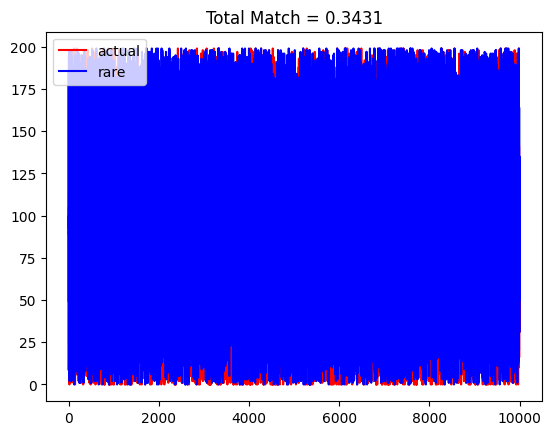

In [183]:
import matplotlib.pyplot as plt

def distance(X,Y):
    dims = X.shape[1]
    dist = np.abs(X ** dims - Y ** dims)
    dist = dist ** (1 / dims)
    return np.sum(dist, axis=1)

total_sample = 100

actual_min_index = []
rare_row_index = []

for sample in range(10000): 

    start_row = 0
    end_row = 200

    rare_row = np.random.randint(0, end_row)

    typical_low = 0
    typical_high = 0

    while typical_low == typical_high:
        typical_r0 = np.random.randint(0, 100)
        typical_r1 = np.random.randint(0, 100)
        typical_low = min(typical_r0, typical_r1)
        typical_high = max(typical_r0, typical_r1)

    rare_low = 0
    rare_high = 0

    while rare_low == rare_high: 
        rare_r0 = np.random.randint(0, 100)
        rare_r1 = np.random.randint(0, 100)
        rare_low = min(rare_r0, rare_r1)
        rare_high = max(rare_r0, rare_r1)

    col_size = 10
    tokens_list = []

    for i in range(0, end_row):
        if i == rare_row:
            tokens_list.append(np.random.randint(rare_low, rare_high, col_size))
        else:
            tokens_list.append(np.random.randint(typical_low, typical_high, col_size))

    tokens = np.array(tokens_list)

    # Self-Attention
    atten_res = softmax(tokens @ tokens.T) @ tokens
    actual_min_index.append(np.argmin(distance(atten_res, tokens)))
    rare_row_index.append(rare_row)

total_match = 0
for x,y in zip(actual_min_index, rare_row_index):
    if x == y:
        total_match += 1

total_sample = len(actual_min_index)
percent_match = total_match / total_sample

plt.plot(np.arange(len(actual_min_index)), actual_min_index, color='red', label='actual')
plt.plot(np.arange(len(actual_min_index)), rare_row_index, color='blue', label='rare')
plt.title(f'Total Match = {percent_match}')
plt.legend()
plt.show()


#### Insights
- Self Attention are more likely to mask the rarest instance of tokens. It implies that it will pay attention more to some set of tokens that's has higher entropy.
- Our experiment shows around **~36%** of the time which is pretty significant given that we have 199 samples of typical token set and 1 sample of a rare token set.